# Implementation of Clonal selection algorithm using Python.

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# Objective function (we want to minimize this)
def objective_function(x):
    return x[0]**2 + x[1]**2  # Simple paraboloid

In [34]:
# Generate a random antibody (solution)
def random_antibody(bounds):
    return np.random.uniform(bounds[0], bounds[1], 2)

In [35]:
# Mutate an antibody (small change)
def mutate(antibody, mutation_rate, bounds):
    mutation = antibody + np.random.normal(0, mutation_rate, size=2)
    return np.clip(mutation, bounds[0], bounds[1])

In [37]:
# Main Clonal Selection Algorithm with theoretical outputs and convergence data
def clonal_selection(objective_function, bounds, n_population=20, n_generations=20, n_clones=5, mutation_rate=0.1):
    population = [random_antibody(bounds) for _ in range(n_population)]
    history = []
    best_scores = []

    print("=== Clonal Selection Algorithm Theoretical Output ===\n")

    for gen in range(n_generations):
        fitness = np.array([objective_function(p) for p in population])
        sorted_indices = np.argsort(fitness)
        population = [population[i] for i in sorted_indices]
        best = population[0]
        best_fitness = fitness[sorted_indices[0]]
        avg_fitness = np.mean(fitness)

        # Print theoretical output
        print(f"Generation {gen+1:02d}:")
        print(f" Best Antibody: {best}")
        print(f" Best Fitness : {best_fitness:.4f}")
        print(f" Avg Fitness  : {avg_fitness:.4f}\n")

        history.append(population)
        best_scores.append(best_fitness)

        # Clone and mutate
        new_population = []
        for i in range(n_population):
            for _ in range(n_clones):
                clone = mutate(population[i], mutation_rate, bounds)
                new_population.append(clone)

        new_fitness = np.array([objective_function(p) for p in new_population])
        best_indices = np.argsort(new_fitness)[:n_population]
        population = [new_population[i] for i in best_indices]

    return history, best_scores

history, best_scores = clonal_selection(objective_function, bounds, n_population=15, n_generations=20, n_clones=5, mutation_rate=0.2)


=== Clonal Selection Algorithm Theoretical Output ===

Generation 01:
 Best Antibody: [-0.19638581 -0.48597153]
 Best Fitness : 0.2747
 Avg Fitness  : 17.1084

Generation 02:
 Best Antibody: [ 0.13110031 -0.4530205 ]
 Best Fitness : 0.2224
 Avg Fitness  : 1.9097

Generation 03:
 Best Antibody: [ 0.27815931 -0.10095193]
 Best Fitness : 0.0876
 Avg Fitness  : 0.3039

Generation 04:
 Best Antibody: [ 0.09054918 -0.12138218]
 Best Fitness : 0.0229
 Avg Fitness  : 0.0935

Generation 05:
 Best Antibody: [0.05167695 0.00232329]
 Best Fitness : 0.0027
 Avg Fitness  : 0.0313

Generation 06:
 Best Antibody: [0.01005057 0.01572671]
 Best Fitness : 0.0003
 Avg Fitness  : 0.0089

Generation 07:
 Best Antibody: [-0.01918154  0.00514324]
 Best Fitness : 0.0004
 Avg Fitness  : 0.0088

Generation 08:
 Best Antibody: [-0.00152191 -0.03809865]
 Best Fitness : 0.0015
 Avg Fitness  : 0.0064

Generation 09:
 Best Antibody: [0.01677235 0.01369983]
 Best Fitness : 0.0005
 Avg Fitness  : 0.0122

Generation 10:

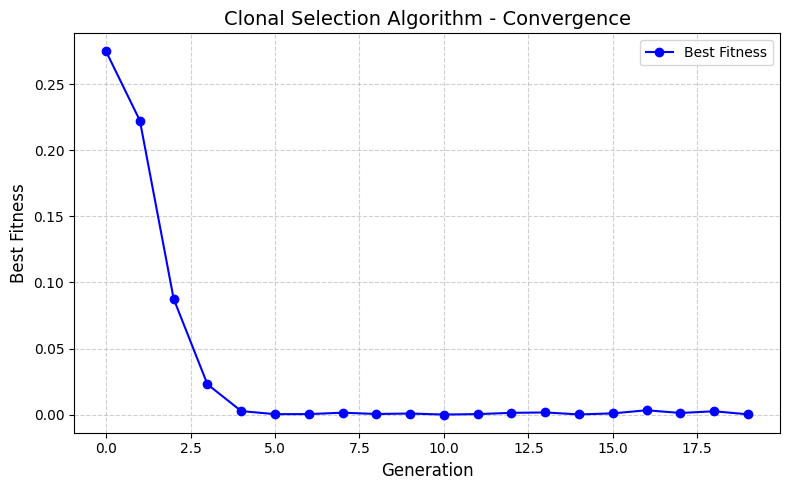

In [38]:
# Plot convergence graph
def plot_convergence(best_scores):
    plt.figure(figsize=(8, 5))
    plt.plot(best_scores, marker='o', linestyle='-', color='blue', label='Best Fitness')
    plt.title("Clonal Selection Algorithm - Convergence", fontsize=14)
    plt.xlabel("Generation", fontsize=12)
    plt.ylabel("Best Fitness", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()


plot_convergence(best_scores)
